In [ ]:
install.packages("lmtest")
install.packages("sandwich")

# Load the required library
library(lmtest)
library(sandwich)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
car_data <- data.frame(
  mpg = c(21, 23, 18, 25, 19, 22, 20, 24, 17, 26),
  engine_size = c(2.0, 2.2, 2.5, 1.8, 2.3, 2.1, 2.4, 1.9, 2.2, 2.6),
  weight = c(3000, 3200, 3500, 2800, 3300, 3100, 3400, 2900, 3600, 2700)
)
#view data frame
return(car_data)

mpg,engine_size,weight
<dbl>,<dbl>,<dbl>
21,2.0,3000
23,2.2,3200
18,2.5,3500
25,1.8,2800
19,2.3,3300
22,2.1,3100
20,2.4,3400
24,1.9,2900
17,2.2,3600


In [ ]:
car_model <- lm(mpg ~ engine_size + weight, data = car_data)

In [ ]:
coeftest(car_model)


t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 50.2325103  4.5374997 11.0705  1.09e-05 ***
engine_size  0.6687243  1.5965455  0.4189 0.6878736    
weight      -0.0095885  0.0013615 -7.0424 0.0002038 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


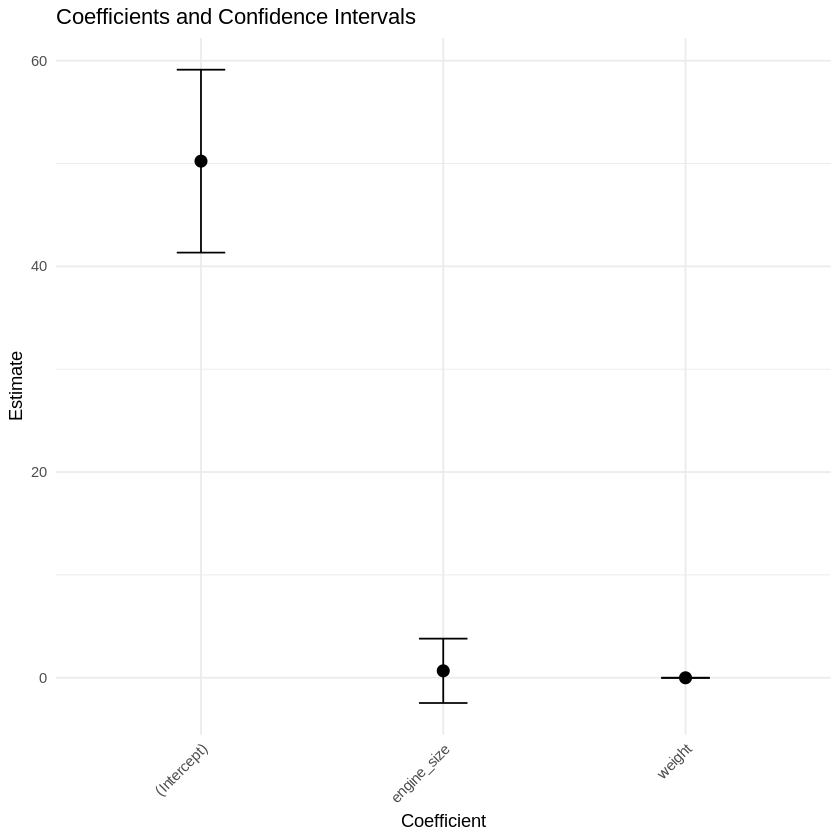

In [ ]:
coefficients <- coef(car_model)
std_errors <- sqrt(diag(vcov(car_model)))

plot_data <- data.frame(
  Coefficient = names(coefficients),
  Estimate = coefficients,
  Std_Error = std_errors
)

library(ggplot2)

ggplot(plot_data, aes(x = Coefficient, y = Estimate, ymin = Estimate - 1.96 * Std_Error,
                                           ymax = Estimate + 1.96 * Std_Error)) +
  geom_point(size = 3) +
  geom_errorbar(width = 0.2) +
  labs(title = "Coefficients and Confidence Intervals",
       x = "Coefficient",
       y = "Estimate") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [ ]:
# Sample data
data <- c("A", "B", "A", "C", "A", "B", "A", "C", "D")

# Using table() function to get frequency counts
freq_table <- table(data)
print(freq_table)

data
A B C D 
4 2 2 1 


In [ ]:
# Load the dplyr package
library(dplyr)

# Sample data frame
df <- data.frame(
  ID = c(101, 102, 103, 101, 104),
  Gender = c("Male", "Female", "Male", "Male", "Female")
)

# Using dplyr package to count occurrences of each gender
df_freq <- df %>% group_by(Gender) %>% summarise(count = n())
print(df_freq)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# A tibble: 2 × 2
  Gender count
  <chr>  <int>
1 Female     2
2 Male       3


In [ ]:
# Load the data.table package
library(data.table)

# Sample data
scores <- c(85, 92, 78, 85, 90, 78, 92, 85, 78, 90)

# Convert data to data.table
dt <- data.table(scores)

# Using data.table package to count occurrences of each score
dt_freq <- dt[, .N, by = .(scores)]
print(dt_freq)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following objects are masked from ‘package:zoo’:

    yearmon, yearqtr




   scores     N
    <num> <int>
1:     85     3
2:     92     2
3:     78     3
4:     90     2


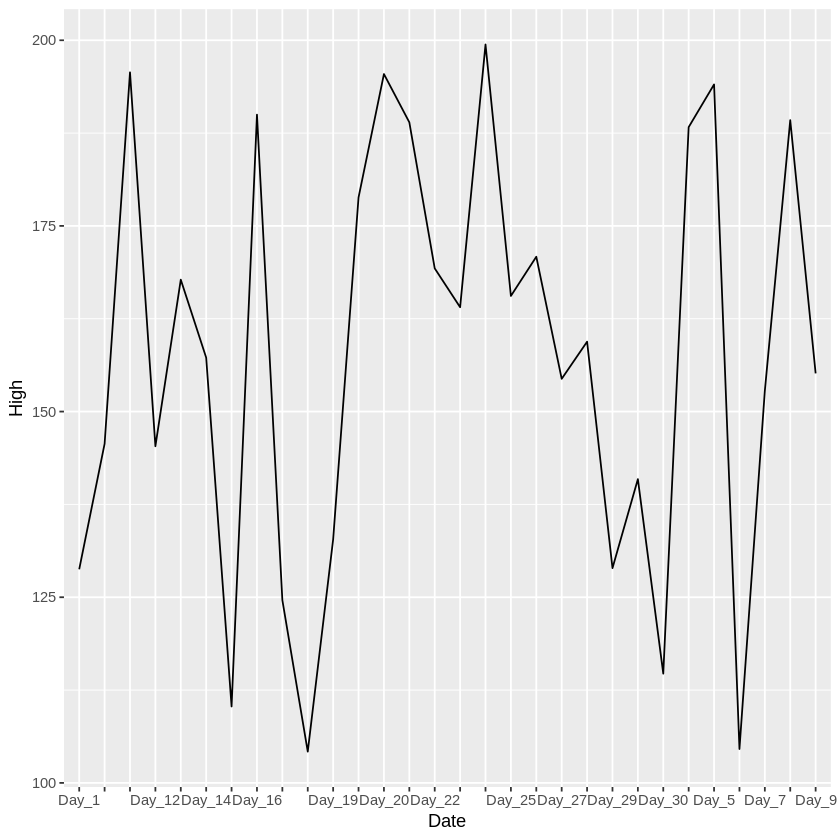

In [ ]:
library(ggplot2)

set.seed(123)

dataframe <- data.frame(
  Date = paste0("Day_", 1:30),
  High = round(runif(30, min = 100, max = 200), 2)
)

ggplot(dataframe, aes(x = Date, y = High, group = 1)) +
  geom_line() +
  scale_x_discrete(guide = guide_axis(check.overlap = TRUE))


In [ ]:
# this line will download forecast package in your IDE
install.packages('forecast')

library('forecast')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
class(AirPassengers)

[1] "ts"

In [ ]:
AirPassengers

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


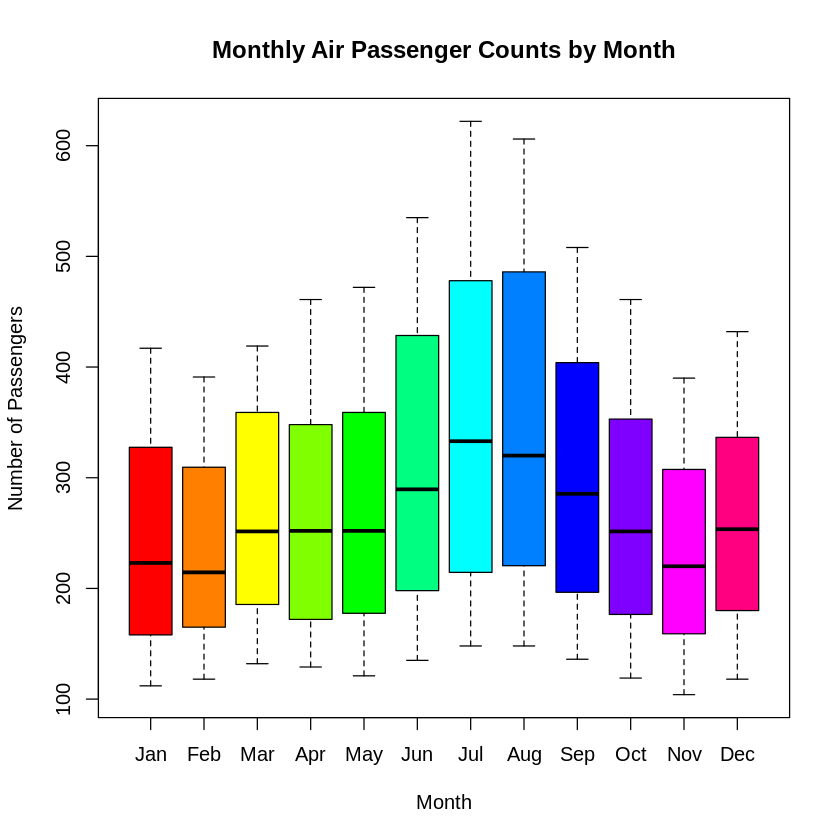

In [ ]:
# Create a color palette for the box plot
my_colors <- rainbow(12)

# Box plot by month with customizations
boxplot(split(AirPassengers, cycle(AirPassengers)),
        xlab = "Month", ylab = "Number of Passengers",
        col = my_colors,  # Assign colors to each box
        border = "black",  # Set the border color
        main = "Monthly Air Passenger Counts by Month",
        names = month.abb,  # Use abbreviated month names as labels
        outline = FALSE)  # Remove outliers

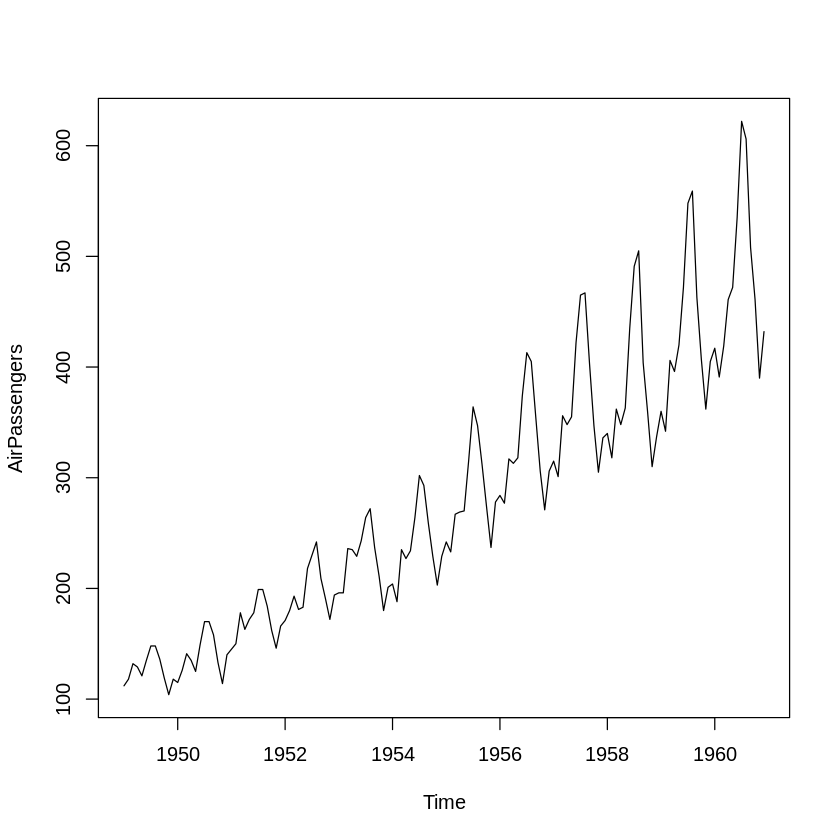

In [ ]:
plot(AirPassengers)

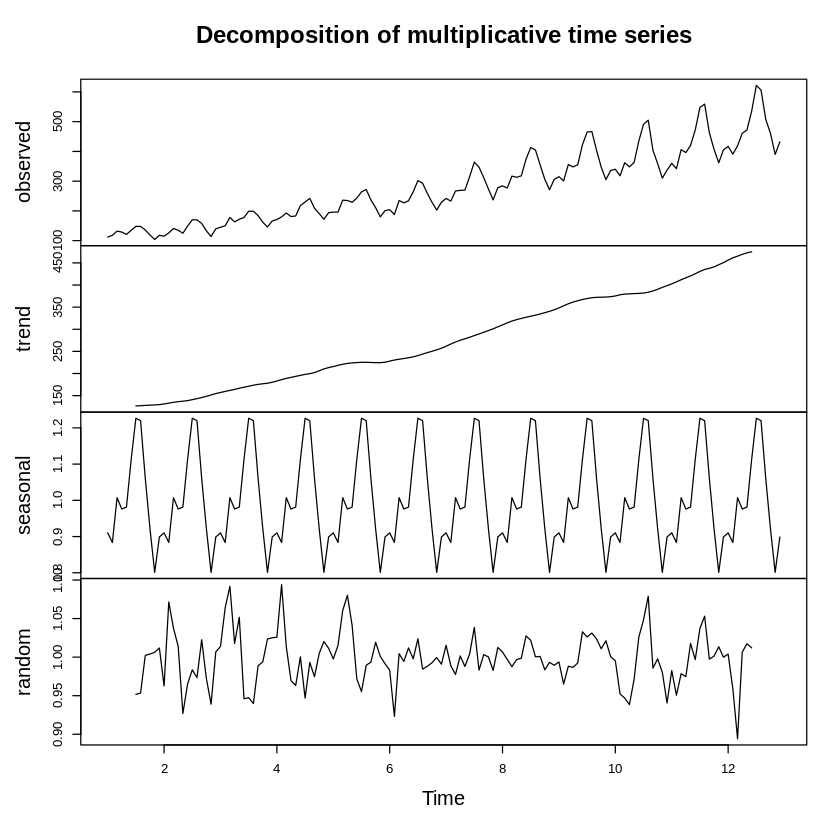

In [ ]:
data<-ts(AirPassengers, frequency=12)
d<-decompose(data, "multiplicative")
plot(d)

Series: AirPassengers 
ARIMA(2,1,1)(0,1,0)[12] 

Coefficients:
         ar1     ar2      ma1
      0.5960  0.2143  -0.9819
s.e.  0.0888  0.0880   0.0292

sigma^2 = 132.3:  log likelihood = -504.92
AIC=1017.85   AICc=1018.17   BIC=1029.35

Training set error measures:
                   ME     RMSE     MAE       MPE     MAPE     MASE         ACF1
Training set 1.342299 10.84619 7.86754 0.4206976 2.800458 0.245628 -0.001248475

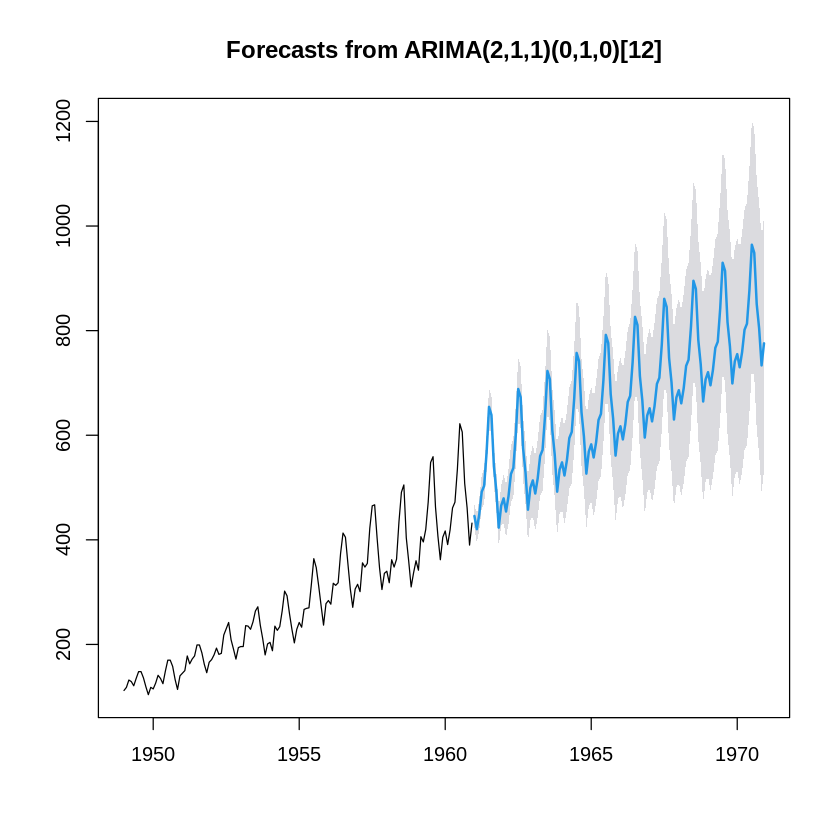

In [ ]:
model<-auto.arima(AirPassengers)
summary(model)

# h = 10*12 because, forecast is for 10 years for all 12 months
f<-forecast(model, level=c(95), h=10*12)
plot(f)